In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
np.random.rand(4)

array([0.14971735, 0.11290661, 0.39833002, 0.31422071])

In [4]:
# mit dem "seed" Befehl, werden jedes Mal die gleichen Zahlen erscheinen
np.random.seed(0)
np.random.rand(4)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [5]:
np.random.seed(0)
np.random.rand(4)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [6]:
n_samples=1500

## Noisy Circles 

In [7]:
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

In [8]:
print(noisy_circles)


(array([[-0.96967089,  0.25252108],
       [ 0.01095097,  0.51036238],
       [-0.61958402,  0.65489053],
       ...,
       [ 0.27571539, -0.91989401],
       [-0.58756798,  0.73826431],
       [-0.33102821,  0.38784718]]), array([0, 1, 0, ..., 0, 0, 1], dtype=int64))


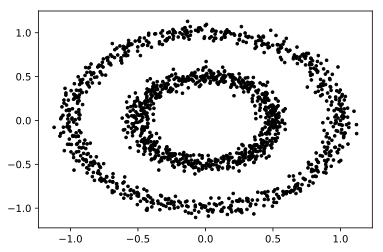

In [9]:
points_noisy_circles=noisy_circles[0]

f1=points_noisy_circles[0:((n_samples)), 0]
f2=points_noisy_circles[0:((n_samples)),1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

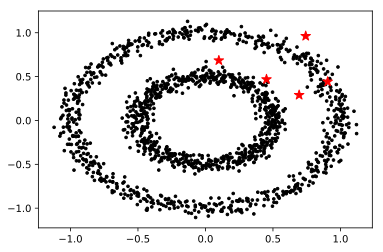

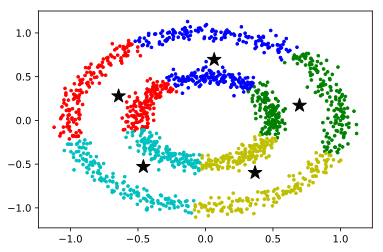

In [10]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=5
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

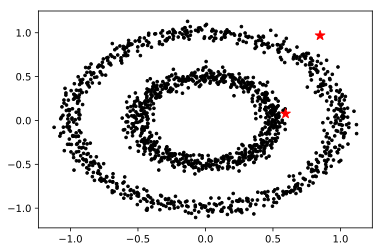

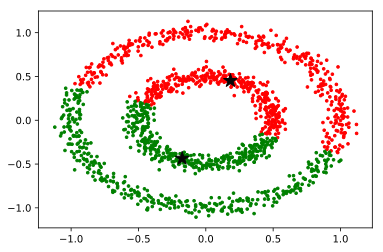

In [11]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=2
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Noisy moons

In [12]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)


In [13]:
print(noisy_moons)

(array([[ 0.16600628, -0.13442974],
       [ 0.28692578,  0.98981336],
       [ 0.81344835,  0.4912689 ],
       ...,
       [ 0.30587049, -0.17648159],
       [ 0.98985894, -0.49839049],
       [ 0.14248725,  1.01664873]]), array([1, 0, 0, ..., 1, 1, 0], dtype=int64))


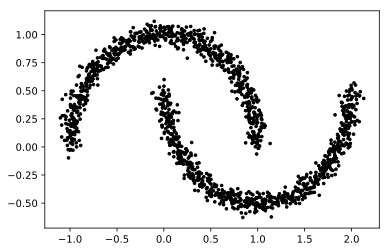

In [14]:
points_noisy_moons=noisy_moons[0]

f1=points_noisy_moons[0:((n_samples)), 0]
f2=points_noisy_moons[0:((n_samples)),1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

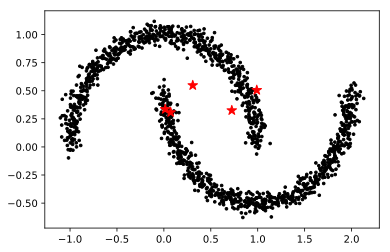

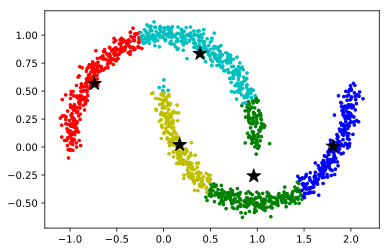

In [15]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=5
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

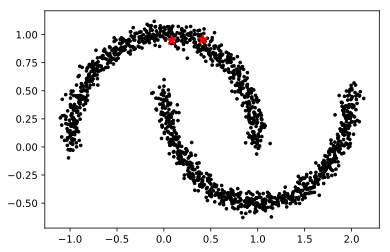

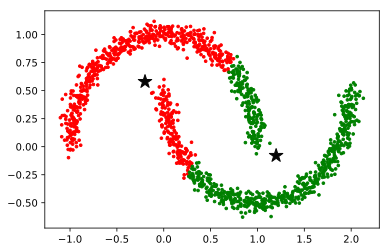

In [16]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=2
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

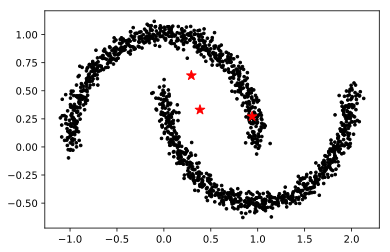

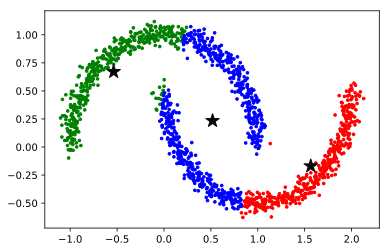

In [17]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=3
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

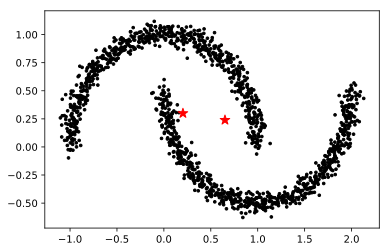

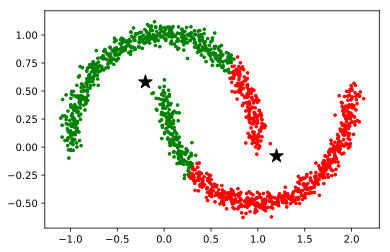

In [18]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=2
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Blobs

In [37]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=15)


In [38]:
print(blobs)

(array([[ 6.37069481, -5.44050555],
       [-4.63742273,  0.46658321],
       [-4.00946586,  2.23471111],
       ...,
       [-9.48237202, -1.54532803],
       [-3.11135554,  0.39913748],
       [-9.31666001, -4.08928912]]), array([0, 2, 2, ..., 1, 2, 1]))


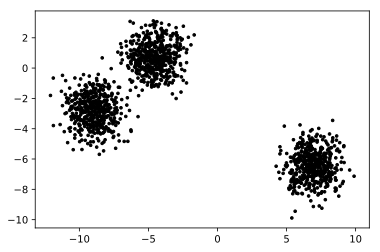

In [39]:
points_blobs=blobs[0]

f1=points_blobs[0:((n_samples)), 0]
f2=points_blobs[0:((n_samples)),1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

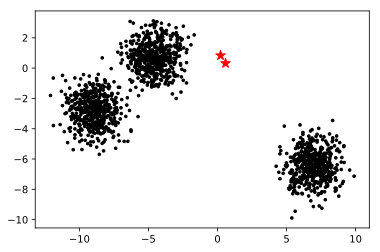

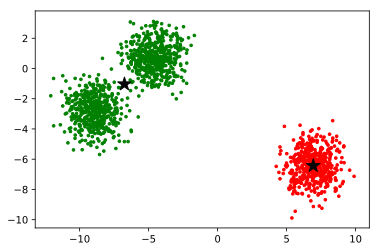

In [40]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=2
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=3
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## no structure

In [31]:
no_structure = np.random.rand(n_samples, 2)


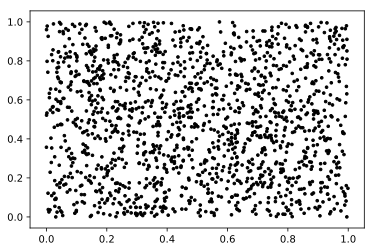

In [32]:
f1=no_structure[0:((n_samples)), 0]
f2=no_structure[0:((n_samples)),1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

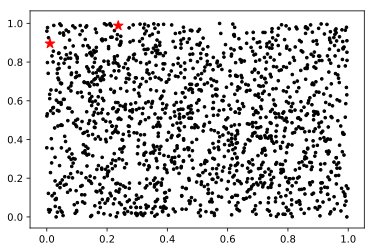

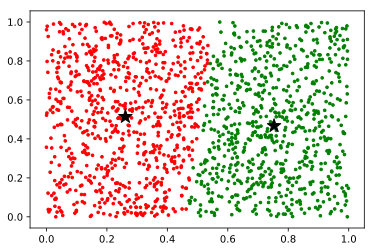

In [33]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

k=2
C = np.random.random((k,2))


cx1= C[0:((k)),0]
cy1 = C[0:((k)),1]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(cx1,cy1,marker='*',c='red',s=100)

clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
error = dist(C, C_old, None)
from copy import deepcopy

while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')